In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import missingno as msno
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Carrega dados do drive

In [77]:
df = pd.read_excel('dataset.xlsx')

In [78]:
# Number of rows and columns
df.shape

(87120, 10)

In [79]:
df.year.max() - df.year.min()

29

In [80]:
# Show first elements of the dataframe
df.head()

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
0,Agua Branca,-7.5118,-37.6366,Sertão Paraibano,Serra do Teixeira,1994,1,1994-01-01,174.4,1
1,Aguiar,-7.0933,-38.1733,Sertão Paraibano,Piancó,1994,1,1994-01-01,441.5,1
2,Alagoa Grande,-7.0367,-35.6311,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,101.0,1
3,Alagoa Nova,-7.0542,-35.7578,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,68.5,1
4,Alagoinha,-6.9589,-35.5525,Agreste Paraibano,Guarabira,1994,1,1994-01-01,64.6,1


# Processa dados

In [81]:
# prompt: Converter coluna 'date' para tipo datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [82]:
# Show microregions
np.sort(df['microregion'].unique())

array(['Brejo Paraibano', 'Cajazeiras', 'Campina Grande',
       'Cariri Ocidental', 'Cariri Oriental', 'Catolé Do Rocha',
       'Catolé do Rocha', 'Curimataú Ocidental', 'Curimataú Oriental',
       'Esperança', 'Guarabira', 'Itabaiana', 'Itaporanga', 'João Pessoa',
       'Litoral Norte', 'Litoral Sul', 'Patos', 'Piancó', 'Sapé',
       'Seridó Ocidental Paraibano', 'Seridó Oriental Paraibano',
       'Serra Do Teixeira', 'Serra do Teixeira', 'Sousa', 'Umbuzeiro'],
      dtype=object)

In [83]:
# Tem umas microregiões com nomes repetidos, por isso vou renomear.
print(df['microregion'].nunique())
df['microregion'] = df['microregion'].replace('Catolé Do Rocha', 'Catolé do Rocha')
df['microregion'] = df['microregion'].replace('Serra Do Teixeira', 'Serra do Teixeira')
print(df['microregion'].nunique())

25
23


In [84]:
# Show mesoregions
df['mesoregion'].unique()

array(['Sertão Paraibano', 'Agreste Paraibano', 'Borborema',
       'Mata Paraibana'], dtype=object)

In [85]:
# Show microregions
np.sort(df['microregion'].unique())

array(['Brejo Paraibano', 'Cajazeiras', 'Campina Grande',
       'Cariri Ocidental', 'Cariri Oriental', 'Catolé do Rocha',
       'Curimataú Ocidental', 'Curimataú Oriental', 'Esperança',
       'Guarabira', 'Itabaiana', 'Itaporanga', 'João Pessoa',
       'Litoral Norte', 'Litoral Sul', 'Patos', 'Piancó', 'Sapé',
       'Seridó Ocidental Paraibano', 'Seridó Oriental Paraibano',
       'Serra do Teixeira', 'Sousa', 'Umbuzeiro'], dtype=object)

In [86]:
print('Number of stations: ', len(df['station'].unique()))
print('Number of mesoregion', len(df['mesoregion'].unique()))
print('Number of microregion', len(df['microregion'].unique()))
print('Data mínima', df['date'].min())
print('Data máxima', df['date'].max())

Number of stations:  242
Number of mesoregion 4
Number of microregion 23
Data mínima 1994-01-01 00:00:00
Data máxima 2023-12-01 00:00:00


In [87]:
df.missing.unique()

array([1, 0], dtype=int64)

In [88]:
# Count missing values per column
df.isna().sum()

station           0
lat               0
long              0
mesoregion        0
microregion       0
year              0
month             0
date              0
rainfall       8451
missing           0
dtype: int64

<Axes: >

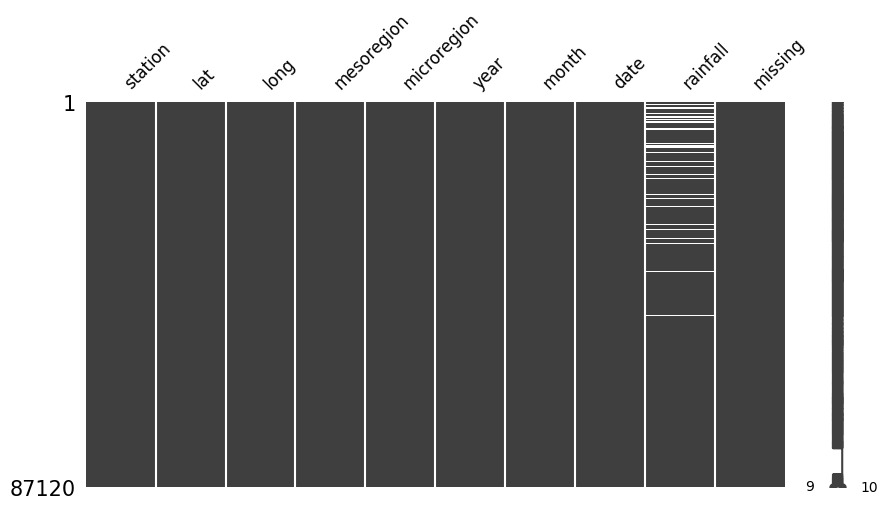

In [89]:
# Show the missing elements in each column
msno.matrix(df, figsize=(10, 5), fontsize=12)

<Axes: >

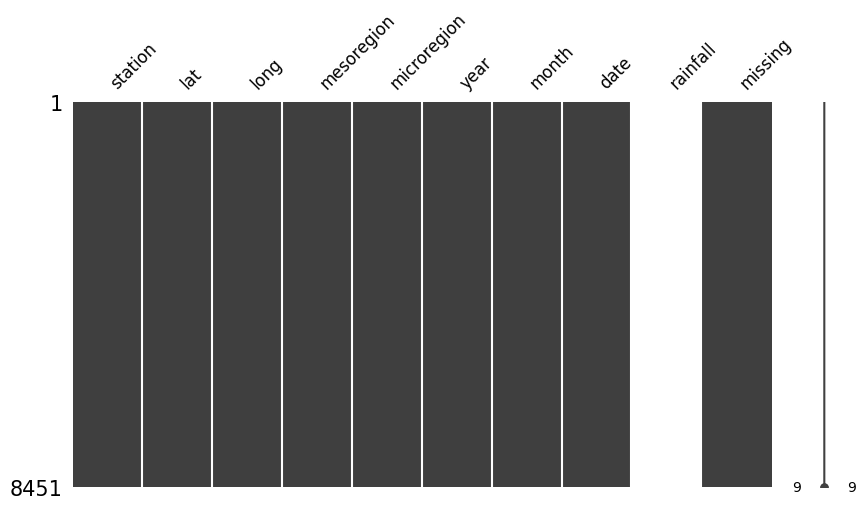

In [90]:
# Show the missing elements in each column when missing==0
msno.matrix(df[df['missing'] == 0], figsize=(10, 5), fontsize=12)

<Axes: >

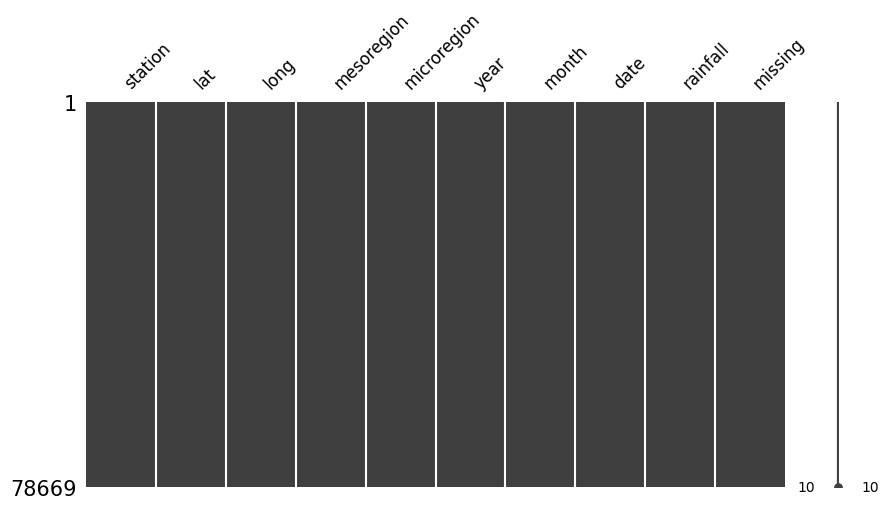

In [91]:
# Show the missing elements in each column when missing==1
msno.matrix(df[df['missing'] == 1], figsize=(10, 5), fontsize=12)

In [92]:
# Samples without raining register
df[df['missing'] == 0]

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
5,Alcantil,-7.7422,-36.0572,Borborema,Cariri Oriental,1994,1,1994-01-01,NaN,0
6,Algodão de Jandaíra,-6.9061,-36.0075,Agreste Paraibano,Curimataú Ocidental,1994,1,1994-01-01,NaN,0
8,Amparo,-7.5697,-37.0639,Borborema,Cariri Ocidental,1994,1,1994-01-01,NaN,0
11,Arara,-6.8314,-35.7625,Agreste Paraibano,Curimataú Ocidental,1994,1,1994-01-01,NaN,0
14,Areia de Baraúnas,-7.1236,-36.9483,Sertão Paraibano,Patos,1994,1,1994-01-01,NaN,0
...,...,...,...,...,...,...,...,...,...,...
87063,Santa Luzia/Riacho do Saco,-6.9639,-36.9203,Borborema,Seridó Ocidental Paraibano,2023,12,2023-12-01,NaN,0
87076,São João do Tigre,-8.0800,-36.8472,Borborema,Cariri Ocidental,2023,12,2023-12-01,NaN,0
87081,São José de Princesa,-7.7417,-38.0992,Sertão Paraibano,Serra do Teixeira,2023,12,2023-12-01,NaN,0
87086,São José dos Ramos,-7.2475,-35.3728,Mata Paraibana,Sapé,2023,12,2023-12-01,NaN,0


In [93]:
# Samples with raining register
df[df['missing'] == 1]

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
0,Agua Branca,-7.5118,-37.6366,Sertão Paraibano,Serra do Teixeira,1994,1,1994-01-01,174.4,1
1,Aguiar,-7.0933,-38.1733,Sertão Paraibano,Piancó,1994,1,1994-01-01,441.5,1
2,Alagoa Grande,-7.0367,-35.6311,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,101.0,1
3,Alagoa Nova,-7.0542,-35.7578,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,68.5,1
4,Alagoinha,-6.9589,-35.5525,Agreste Paraibano,Guarabira,1994,1,1994-01-01,64.6,1
...,...,...,...,...,...,...,...,...,...,...
87115,Umbuzeiro,-7.6958,-35.6642,Agreste Paraibano,Umbuzeiro,2023,12,2023-12-01,58.8,1
87116,Várzea,-6.7722,-36.9925,Borborema,Seridó Ocidental Paraibano,2023,12,2023-12-01,58.2,1
87117,Vieirópolis,-6.5436,-38.2772,Sertão Paraibano,Sousa,2023,12,2023-12-01,99.7,1
87118,Vista Serrana/Desterro de Malta,-6.7386,-37.5683,Sertão Paraibano,Sousa,2023,12,2023-12-01,37.0,1


In [94]:
# Percentual de missing
df[df['missing'] == 0].shape[0] / df.shape[0] * 100

9.700413223140496

In [95]:
# Qtd missing per mesoregion
for r in df['mesoregion'].unique():
  print(str(r), ':', df[df['mesoregion'] == r][df['missing'] == 0]['missing'].shape[0])

Sertão Paraibano : 2402
Agreste Paraibano : 2005
Borborema : 1486
Mata Paraibana : 2558


In [96]:
# Percent missing per mesoregion
for r in df['mesoregion'].unique():
  print(str(r), (df[df['mesoregion'] == r][df['missing'] == 0]['missing'].shape[0] / df[df['mesoregion'] == r].shape[0])*100)

Sertão Paraibano 7.582070707070707
Agreste Paraibano 7.844287949921752
Borborema 8.599537037037038
Mata Paraibana 20.3015873015873


In [97]:
df[df['microregion'] == 'Guarabira']

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
4,Alagoinha,-6.9589,-35.5525,Agreste Paraibano,Guarabira,1994,1,1994-01-01,64.6,1
10,Araçagi,-6.8333,-35.3878,Agreste Paraibano,Guarabira,1994,1,1994-01-01,35.6,1
25,Belém,-6.7031,-35.5356,Agreste Paraibano,Guarabira,1994,1,1994-01-01,NaN,0
44,Caiçara,-6.6147,-35.4681,Agreste Paraibano,Guarabira,1994,1,1994-01-01,28.0,1
76,Cuitegi,-6.8975,-35.5247,Agreste Paraibano,Guarabira,1994,1,1994-01-01,NaN,0
...,...,...,...,...,...,...,...,...,...,...
87016,Mulungu,-7.0311,-35.4692,Agreste Paraibano,Guarabira,2023,12,2023-12-01,19.6,1
87037,Pilõezinhos,-6.8458,-35.5422,Agreste Paraibano,Guarabira,2023,12,2023-12-01,48.8,1
87038,Pirpirituba,-6.7811,-35.4947,Agreste Paraibano,Guarabira,2023,12,2023-12-01,34.9,1
87095,Serra da Raiz,-6.6853,-35.4436,Agreste Paraibano,Guarabira,2023,12,2023-12-01,46.9,1


In [98]:
df[df['microregion'] == 'Guarabira'].missing.value_counts()

1    4333
0     707
Name: missing, dtype: int64

In [99]:
707/5040

0.14027777777777778

In [100]:
# Qtde valores ausentes por microregion
for r in df['microregion'].unique():
  print(str(r), '--', df[df['microregion'] == r][df['missing'] == 0]['missing'].shape[0], \
        '--', df[df['microregion'] == r]['missing'].shape[0], \
        '--', (df[df['microregion'] == r][df['missing'] == 0]['missing'].shape[0] / df[df['microregion'] == r].shape[0])*100)

Serra do Teixeira -- 500 -- 3960 -- 12.626262626262626
Piancó -- 7 -- 3240 -- 0.21604938271604937
Brejo Paraibano -- 118 -- 2880 -- 4.097222222222222
Guarabira -- 707 -- 5040 -- 14.027777777777779
Cariri Oriental -- 526 -- 4680 -- 11.23931623931624
Curimataú Ocidental -- 157 -- 4320 -- 3.6342592592592595
Litoral Sul -- 73 -- 1440 -- 5.069444444444445
Cariri Ocidental -- 662 -- 6480 -- 10.216049382716049
Sousa -- 501 -- 6480 -- 7.731481481481481
Curimataú Oriental -- 146 -- 2520 -- 5.7936507936507935
Patos -- 252 -- 3240 -- 7.777777777777778
Esperança -- 113 -- 1800 -- 6.277777777777778
Umbuzeiro -- 240 -- 1800 -- 13.333333333333334
Litoral Norte -- 1181 -- 4320 -- 27.337962962962965
Seridó Oriental Paraibano -- 297 -- 3600 -- 8.25
João Pessoa -- 703 -- 3600 -- 19.52777777777778
Catolé do Rocha -- 196 -- 4320 -- 4.537037037037037
Cajazeiras -- 609 -- 6120 -- 9.950980392156863
Itaporanga -- 337 -- 4320 -- 7.8009259259259265
Campina Grande -- 318 -- 3960 -- 8.030303030303031
Itabaiana -- 

In [101]:
# prompt: Top 10 station with more missing. Show missing and percent of missing.

# Calculate missing counts and percentages for each station
station_missing = df[df['missing'] == 0].groupby('station')['missing'].count().reset_index(name='missing_count')
station_total = df.groupby('station')['missing'].count().reset_index(name='total_count')

# Merge the two dataframes
station_missing = pd.merge(station_missing, station_total, on='station')

# Calculate percentage of missing values
station_missing['missing_percent'] = (station_missing['missing_count'] / station_missing['total_count']) * 100

# Sort by missing count in descending order and select the top 10
top_10_missing = station_missing.sort_values('missing_count', ascending=False).head(10)

print(top_10_missing[['station', 'missing_count', 'missing_percent']])


               station  missing_count  missing_percent
67            Marcação            293        81.388889
98     Riachão do Poço            262        72.777778
113          Sumé/UFCG            261        72.500000
86         Pedro Régis            259        71.944444
74            Maturéia            214        59.444444
4    Areia de Baraúnas            207        57.500000
64          Logradouro            203        56.388889
110        Sertãozinho            202        56.111111
111            Sobrado            201        55.833333
42      Curral de Cima            169        46.944444


In [102]:
# Datas que não tiveram registro de chuva
df[df['missing'] == 0].date.unique()

array(['1994-01-01T00:00:00.000000000', '1994-02-01T00:00:00.000000000',
       '1994-03-01T00:00:00.000000000', '1994-04-01T00:00:00.000000000',
       '1994-05-01T00:00:00.000000000', '1994-06-01T00:00:00.000000000',
       '1994-07-01T00:00:00.000000000', '1994-08-01T00:00:00.000000000',
       '1994-09-01T00:00:00.000000000', '1994-10-01T00:00:00.000000000',
       '1994-11-01T00:00:00.000000000', '1994-12-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01

In [103]:
# Datas que não tiveram registro de chuva.
# conclusão: quase todos os anos faltaram alguns registros
df[df['missing'] == 0].year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2023], dtype=int64)

In [104]:
# Meses com mais ausencias de registros
df.groupby(['year', 'month'])['missing'].sum().sort_values(ascending=False).head(20)

year  month
2021  10       242
2022  7        242
      5        242
      4        242
      2        242
      1        242
2021  12       242
      11       242
      9        242
      8        242
      7        242
      6        242
      5        242
      4        242
      3        242
      2        242
      1        242
2022  6        242
      3        242
      8        242
Name: missing, dtype: int64

In [105]:
df[df['missing'] == 0]['date'].values

array(['1994-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', ...,
       '2023-12-01T00:00:00.000000000', '2023-12-01T00:00:00.000000000',
       '2023-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [106]:
# Validate missing cases
df[df['missing'] == 0].missing.unique()

array([0], dtype=int64)

In [107]:
# Validate non-missing cases
df[df['missing'] != 0].missing.unique()

array([1], dtype=int64)

Shape: (87120,)


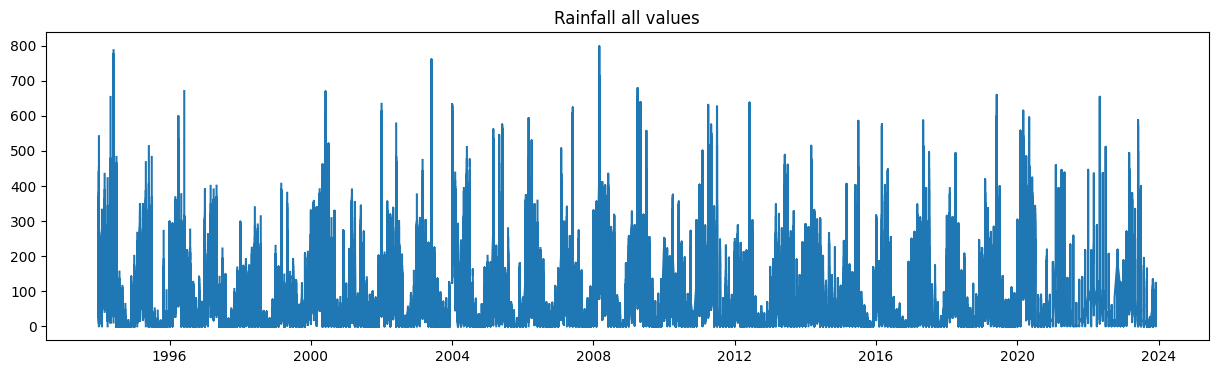

In [108]:
plt.figure(figsize=(15, 4))
plt.plot(df['date'].values, df['rainfall'].values, linestyle='solid')
print('Shape:', df['rainfall'].shape)
plt.title('Rainfall all values')
plt.show()

In [109]:
df['rainfall'].describe()

count    78669.000000
mean        66.890390
std         86.020759
min          0.000000
25%          4.200000
50%         33.600000
75%         98.100000
max        798.100000
Name: rainfall, dtype: float64

Shape: (78669,)


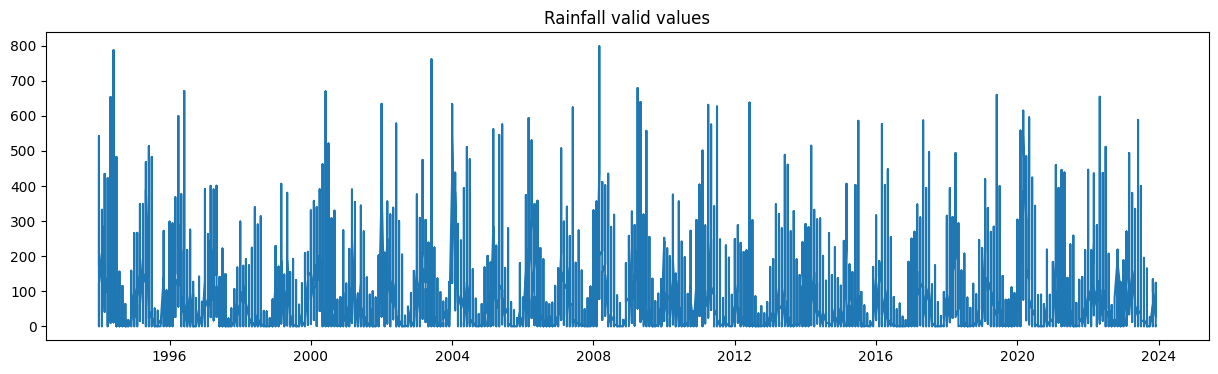

In [110]:
plt.figure(figsize=(15, 4))
mask = df['missing'] != 0
plt.plot(df['date'].values[mask], df['rainfall'].values[mask], linestyle='solid')
print('Shape:', df['rainfall'].values[mask].shape)
plt.title('Rainfall valid values')
plt.show()


In [111]:
pd.DataFrame(df['rainfall'].values[mask]).describe()

,0
count,78669.000000
mean,66.890390
std,86.020759
min,0.000000
25%,4.200000
50%,33.600000
75%,98.100000
max,798.100000


In [112]:
# Number of stations per mesoregion
df.groupby('mesoregion')['station'].nunique().sort_values(ascending=False)


mesoregion
Sertão Paraibano     88
Agreste Paraibano    71
Borborema            48
Mata Paraibana       35
Name: station, dtype: int64

In [113]:
# Number of stations per microregion
df.groupby(['mesoregion', 'microregion'])['station'].nunique().sort_values(ascending=False)


mesoregion         microregion               
Sertão Paraibano   Sousa                         18
Borborema          Cariri Ocidental              18
Sertão Paraibano   Cajazeiras                    17
Agreste Paraibano  Guarabira                     14
Borborema          Cariri Oriental               13
Agreste Paraibano  Curimataú Ocidental           12
Sertão Paraibano   Itaporanga                    12
                   Catolé do Rocha               12
Mata Paraibana     Litoral Norte                 12
Sertão Paraibano   Serra do Teixeira             11
Agreste Paraibano  Campina Grande                11
Mata Paraibana     João Pessoa                   10
Borborema          Seridó Oriental Paraibano     10
Mata Paraibana     Sapé                           9
Agreste Paraibano  Itabaiana                      9
Sertão Paraibano   Patos                          9
                   Piancó                         9
Agreste Paraibano  Brejo Paraibano                8
Borborema         

In [114]:
# Number of missing per stations
def missing_per_station(df):
    # Contar os valores não-missing (missing == 1)
    # Contar os valores não-missing (missing == 1)
    non_missing_counts = df[df['missing'] == 1].groupby(['mesoregion', 'microregion', 'station'])['missing'].count().reset_index(name='non_missing')

    # Contar os valores missing (missing == 0)
    missing_counts = df[df['missing'] == 0].groupby(['mesoregion', 'microregion', 'station'])['missing'].count().reset_index(name='missing')

    # Contar o total de entradas
    total_counts = df.groupby(['mesoregion', 'microregion', 'station'])['missing'].count().reset_index(name='total')


    # Combinar as contagens de non_missing e missing
    combined_counts = pd.merge(total_counts, non_missing_counts, on=['mesoregion', 'microregion', 'station'], how='left').fillna(0)
    combined_counts = pd.merge(combined_counts, missing_counts, on=['mesoregion', 'microregion', 'station'], how='left').fillna(0)

    # Calcular o percentual de missing
    combined_counts['percent_missing'] = (combined_counts['missing'] / combined_counts['total']) * 100

    # Ordenar pelos valores missing
    result = combined_counts.sort_values(by='missing', ascending=False)

    # Exibir o resultado
    return result


In [115]:
qtd_miss = missing_per_station(df)

In [116]:
qtd_miss

,mesoregion,microregion,station,total,non_missing,missing,percent_missing
137,Mata Paraibana,Litoral Norte,Marcação,360,67,293.0,81.388889
149,Mata Paraibana,Sapé,Riachão do Poço,360,98,262.0,72.777778
83,Borborema,Cariri Ocidental,Sumé/UFCG,360,99,261.0,72.500000
139,Mata Paraibana,Litoral Norte,Pedro Régis,360,101,259.0,71.944444
219,Sertão Paraibano,Serra do Teixeira,Maturéia,360,146,214.0,59.444444
...,...,...,...,...,...,...,...
93,Borborema,Cariri Oriental,Cabaceiras,360,360,0.0,0.000000
92,Borborema,Cariri Oriental,Boqueirão/Açude Boqueirão,360,360,0.0,0.000000
91,Borborema,Cariri Oriental,Barra de São Miguel,360,360,0.0,0.000000
87,Borborema,Cariri Ocidental,Taperoá,360,360,0.0,0.000000


In [117]:
# Pra dar um confere com os dados do Elias
qtd_miss[qtd_miss['station'] == 'Logradouro']

,mesoregion,microregion,station,total,non_missing,missing,percent_missing
51,Agreste Paraibano,Guarabira,Logradouro,360,157,203.0,56.388889


In [118]:
# Para ver se há nomes repetidos com pequenas variações, ex: Barra de Santana e Barra De Santana.
# Conclusão: Não tem.
np.sort(qtd_miss['station'].unique())

array(['Agua Branca', 'Aguiar', 'Alagoa Grande', 'Alagoa Nova',
       'Alagoinha', 'Alcantil', 'Algodão de Jandaíra', 'Alhandra',
       'Amparo', 'Aparecida', 'Arara', 'Araruna', 'Araçagi', 'Areia',
       'Areia de Baraúnas', 'Areial', 'Aroeiras', 'Assunção',
       'Bananeiras', 'Baraúna', 'Barra de Santa Rosa', 'Barra de Santana',
       'Barra de São Miguel', 'Bayeux', 'Baía da Traição', 'Belém',
       'Belém do Brejo do Cruz', 'Bernardino Batista', 'Boa Ventura',
       'Boa Vista', 'Bom Jesus', 'Bom Sucesso', 'Bonito de Santa Fé',
       'Boqueirão/Açude Boqueirão', 'Borborema', 'Brejo do Cruz',
       'Brejo dos Santos', 'Caaporã', 'Cabaceiras', 'Cabedelo',
       'Cachoeira dos Índios', 'Cacimba de Areia', 'Cacimba de Dentro',
       'Cacimbas', 'Caiçara', 'Cajazeiras',
       'Cajazeiras/Açude Engenheiro Avidos',
       'Cajazeiras/Açude Lagoa do Arroz', 'Cajazeirinhas',
       'Caldas Brandão', 'Camalaú', 'Campina Grande/EMBRAPA',
       'Campina Grande/INSA', 'Campina Gra

# Data with missing

In [119]:
df1 = df[df['missing'] == 1]
df1.shape

(78669, 10)

In [120]:
df1.rainfall.isnull().value_counts()

False    78669
Name: rainfall, dtype: int64

In [121]:
df1

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
0,Agua Branca,-7.5118,-37.6366,Sertão Paraibano,Serra do Teixeira,1994,1,1994-01-01,174.4,1
1,Aguiar,-7.0933,-38.1733,Sertão Paraibano,Piancó,1994,1,1994-01-01,441.5,1
2,Alagoa Grande,-7.0367,-35.6311,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,101.0,1
3,Alagoa Nova,-7.0542,-35.7578,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,68.5,1
4,Alagoinha,-6.9589,-35.5525,Agreste Paraibano,Guarabira,1994,1,1994-01-01,64.6,1
...,...,...,...,...,...,...,...,...,...,...
87115,Umbuzeiro,-7.6958,-35.6642,Agreste Paraibano,Umbuzeiro,2023,12,2023-12-01,58.8,1
87116,Várzea,-6.7722,-36.9925,Borborema,Seridó Ocidental Paraibano,2023,12,2023-12-01,58.2,1
87117,Vieirópolis,-6.5436,-38.2772,Sertão Paraibano,Sousa,2023,12,2023-12-01,99.7,1
87118,Vista Serrana/Desterro de Malta,-6.7386,-37.5683,Sertão Paraibano,Sousa,2023,12,2023-12-01,37.0,1


In [122]:
# Nessa divisão peguei 10% das estações, que seria 24, e deixei de fora do ajuste
selected_station = ['Baía da Traição', 'Boa Vista', 'Cacimba de Dentro','Cacimbas', 'Caiçara', 'Catingueira',
                    'Emas', 'Esperança/São Miguel', 'João Pessoa/Mares', 'Juru', 'Mamanguape', 'Marcação',
                    'Monte Horebe', 'Princesa Isabel', 'Riachão', 'Rio Tinto', 'Santa Teresinha', 'São José de Caiana',
                    'São José de Espinharas', 'São José do Sabugi', 'São Sebastião de Lagoa de Roça', 'Serra Grande', 'Serra Redonda', 'Sumé']

In [123]:
df1.shape

(78669, 10)

In [124]:
df_teste = df1[df1['station'].isin(selected_station)]
df_treino = df1[~df1['station'].isin(selected_station)]
df_teste.shape, df_treino.shape

((7903, 10), (70766, 10))

In [125]:
df_treino['station'].nunique(), df_teste['station'].nunique()

(218, 24)

In [126]:
del selected_station

In [127]:
# Verifica a frequencia dos dados de rainfall (missing nas estações) DF_TESTE

# Gerar todas as combinações de anos e meses para o período de interesse
all_months_years = pd.MultiIndex.from_product([range(1994, 2023 + 1), range(1, 13)], names=["year", "month"])

# Função para verificar dados completos por estação e calcular a porcentagem de missing
def check_missing_data(group):
    group_index = pd.MultiIndex.from_arrays([group['year'], group['month']])
    missing_index = all_months_years.difference(group_index)
    total_months = len(all_months_years)
    missing_months = len(missing_index)
    missing_percentage = (missing_months / total_months) * 100
    return pd.Series({
        'has_complete_data': missing_index.empty,
        'missing_percentage': missing_percentage
    })

# Verificar estações com dados completos e calcular a porcentagem de missing
station_status = df_teste.groupby('station').apply(check_missing_data)
stations_with_incomplete_data = station_status[~station_status['has_complete_data']]

print(f"Number of stations with incomplete data: {len(stations_with_incomplete_data)}")
print(stations_with_incomplete_data[['missing_percentage']].sort_values(by='missing_percentage', ascending=False).head())

# Filtrar o DataFrame para obter apenas as estações com dados incompletos
df_incomplete_stations_teste = df_teste[df_teste['station'].isin(stations_with_incomplete_data.index)]

Number of stations with incomplete data: 11
                                missing_percentage
station                                           
Marcação                                 81.388889
Cacimbas                                 36.388889
Riachão                                  35.277778
João Pessoa/Mares                         7.500000
São Sebastião de Lagoa de Roça            7.222222


In [128]:
df_incomplete_stations_teste

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
4132,Baía da Traição,-6.6714,-34.9539,Mata Paraibana,Litoral Norte,1995,6,1995-06-01,402.5,1
4374,Baía da Traição,-6.6714,-34.9539,Mata Paraibana,Litoral Norte,1995,7,1995-07-01,366.8,1
4616,Baía da Traição,-6.6714,-34.9539,Mata Paraibana,Litoral Norte,1995,8,1995-08-01,21.2,1
4858,Baía da Traição,-6.6714,-34.9539,Mata Paraibana,Litoral Norte,1995,9,1995-09-01,44.5,1
5100,Baía da Traição,-6.6714,-34.9539,Mata Paraibana,Litoral Norte,1995,10,1995-10-01,3.5,1
...,...,...,...,...,...,...,...,...,...,...
87050,Riachão,-6.5403,-35.6603,Agreste Paraibano,Curimataú Oriental,2023,12,2023-12-01,12.2,1
87055,Rio Tinto,-6.8100,-35.0747,Mata Paraibana,Litoral Norte,2023,12,2023-12-01,74.3,1
87078,São José de Caiana,-7.2525,-38.2997,Sertão Paraibano,Itaporanga,2023,12,2023-12-01,43.3,1
87089,São Sebastião de Lagoa de Roça,-7.0675,-35.8561,Agreste Paraibano,Esperança,2023,12,2023-12-01,42.7,1


In [129]:
# Verifica a frequencia dos dados de rainfall (missing nas estações)

# Gerar todas as combinações de anos e meses para o período de interesse
all_months_years = pd.MultiIndex.from_product(
    [range(df1['year'].min(), df1['year'].max() + 1), range(1, 13)],
    names=["year", "month"]
)

# Função para verificar dados completos por estação e calcular a porcentagem de missing
def check_missing_data(group):
    group_index = pd.MultiIndex.from_arrays([group['year'], group['month']])
    missing_index = all_months_years.difference(group_index)
    total_months = len(all_months_years)
    missing_months = len(missing_index)
    missing_percentage = (missing_months / total_months) * 100
    return pd.Series({
        'has_complete_data': missing_index.empty,
        'missing_percentage': missing_percentage
    })

# Verificar estações com dados completos e calcular a porcentagem de missing
station_status = df_treino.groupby('station').apply(check_missing_data)
stations_with_incomplete_data = station_status[~station_status['has_complete_data']]

print(f"Number of stations with incomplete data: {len(stations_with_incomplete_data)}")
print(stations_with_incomplete_data[['missing_percentage']].sort_values(by='missing_percentage', ascending=False).head())

# Filtrar o DataFrame para obter apenas as estações com dados incompletos
df_incomplete_stations_treino = df_treino[df_treino['station'].isin(stations_with_incomplete_data.index)]

Number of stations with incomplete data: 121
                   missing_percentage
station                              
Riachão do Poço             72.777778
Sumé/UFCG                   72.500000
Pedro Régis                 71.944444
Maturéia                    59.444444
Areia de Baraúnas           57.500000


In [130]:
df_incomplete_stations_treino

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
31,Bom Sucesso,-6.4414,-37.9292,Sertão Paraibano,Catolé do Rocha,1994,1,1994-01-01,103.4,1
36,Brejo dos Santos,-6.3800,-37.8247,Sertão Paraibano,Catolé do Rocha,1994,1,1994-01-01,105.4,1
49,Caldas Brandão,-7.1025,-35.3244,Agreste Paraibano,Itabaiana,1994,1,1994-01-01,13.0,1
59,Casserengue/Sítio Salgado,-6.7931,-35.8944,Agreste Paraibano,Curimataú Oriental,1994,1,1994-01-01,30.7,1
69,Congo,-7.8022,-36.6586,Borborema,Cariri Ocidental,1994,1,1994-01-01,52.0,1
...,...,...,...,...,...,...,...,...,...,...
87112,Tenório,-6.9408,-36.6294,Borborema,Seridó Oriental Paraibano,2023,12,2023-12-01,105.7,1
87113,Triunfo,-6.5767,-38.5972,Sertão Paraibano,Cajazeiras,2023,12,2023-12-01,32.8,1
87114,Uiraúna,-6.5231,-38.4092,Sertão Paraibano,Cajazeiras,2023,12,2023-12-01,46.5,1
87117,Vieirópolis,-6.5436,-38.2772,Sertão Paraibano,Sousa,2023,12,2023-12-01,99.7,1


In [131]:
del station_status, all_months_years, check_missing_data, \
df_incomplete_stations_treino, df_incomplete_stations_teste, qtd_miss, station_total, \
top_10_missing, station_missing, stations_with_incomplete_data

## Exploratory Analysis

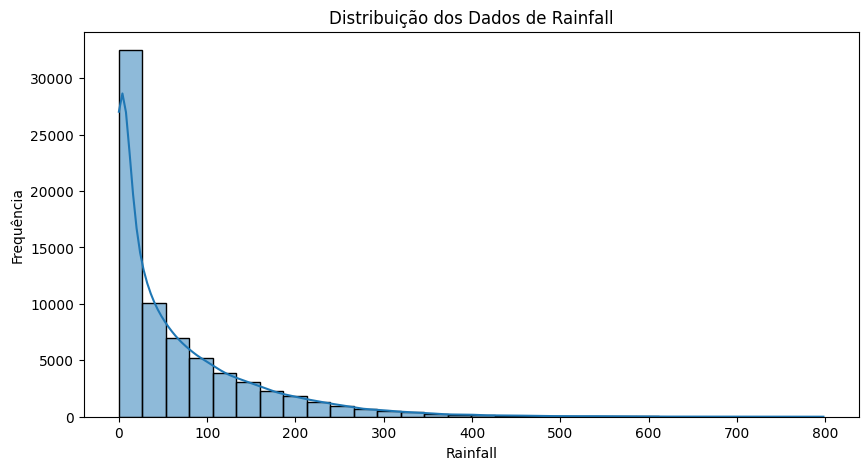

In [132]:
# 1. Analisar a distribuição dos dados de rainfall
plt.figure(figsize=(10, 5))
sns.histplot(df_treino['rainfall'].dropna(), bins=30, kde=True)
plt.title('Distribuição dos Dados de Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequência')
plt.show()

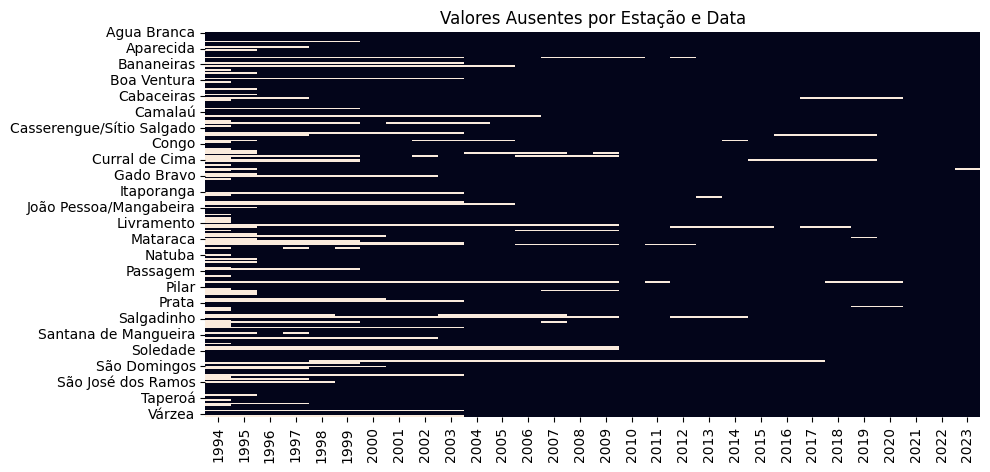

In [133]:
# 2. Visualizar os valores ausentes
plt.figure(figsize=(10, 5))
heatmap_data = df_treino.pivot_table(index='station', columns='year', values='rainfall', aggfunc='mean')
sns.heatmap(heatmap_data.isna(), cbar=False)
plt.title('Valores Ausentes por Estação e Data')
plt.xlabel('')
plt.ylabel('')
plt.show()

del heatmap_data

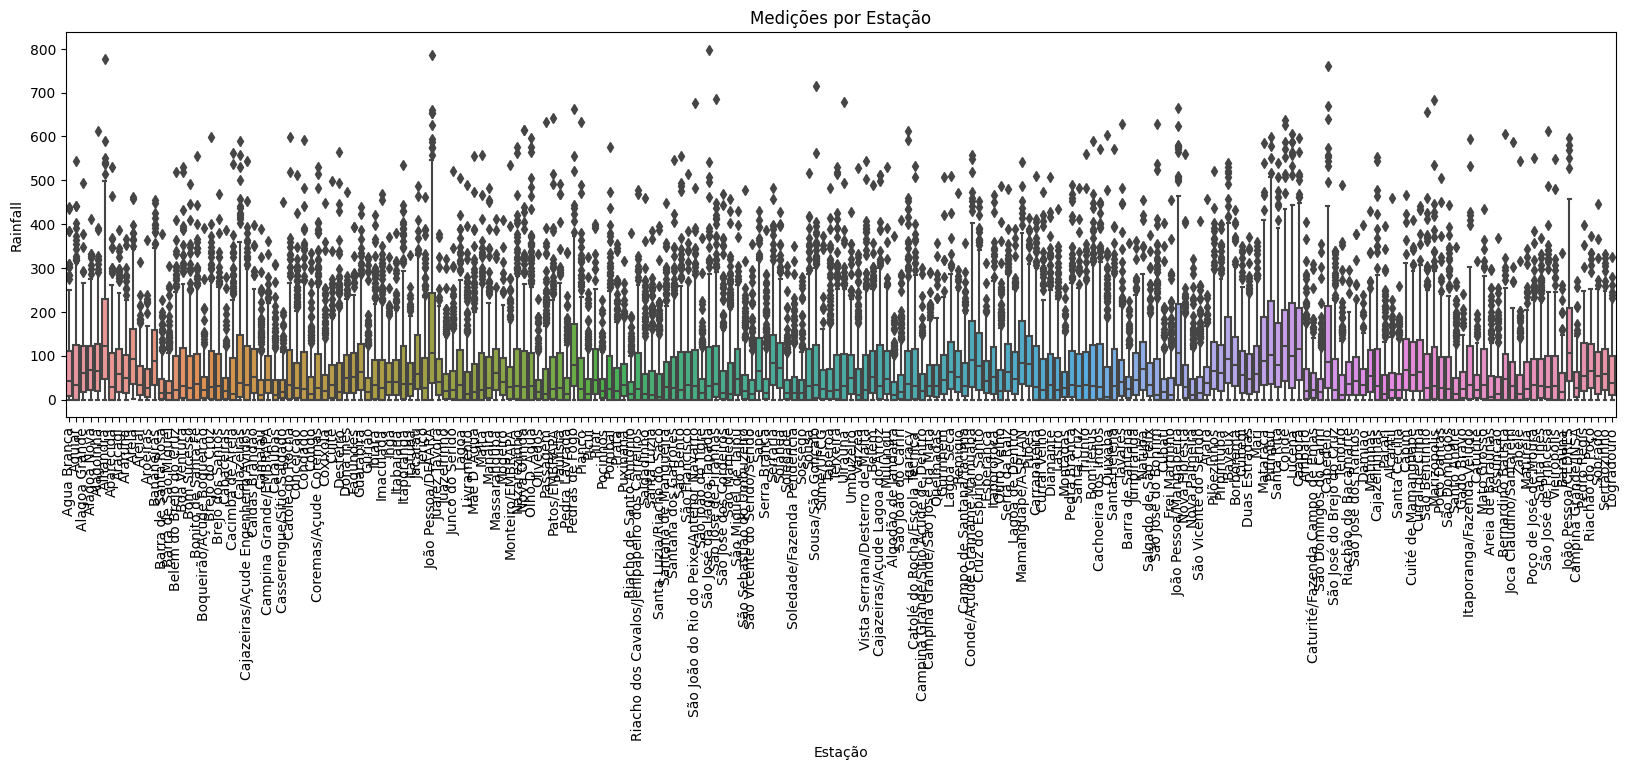

In [134]:
# 4. Analisar a distribuição dos dados de rainfall por estação
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_treino, x='station', y='rainfall')
plt.title('Medições por Estação')
plt.xlabel('Estação')
plt.ylabel('Rainfall')
plt.xticks(rotation=90)
plt.show()

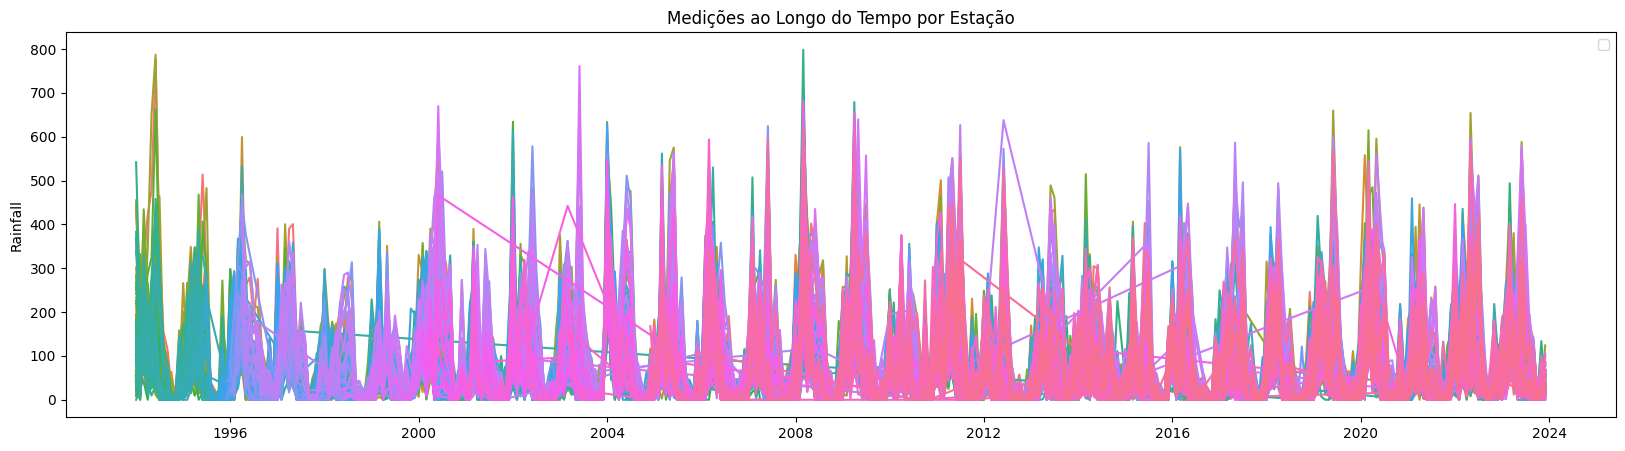

In [135]:
# 5. Analisar a distribuição dos dados de rainfall ao longo do tempo
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_treino, x='date', y='rainfall', hue='station', ci=None)
plt.title('Medições ao Longo do Tempo por Estação')
plt.xlabel('')
plt.ylabel('Rainfall')
plt.legend('')
plt.show()

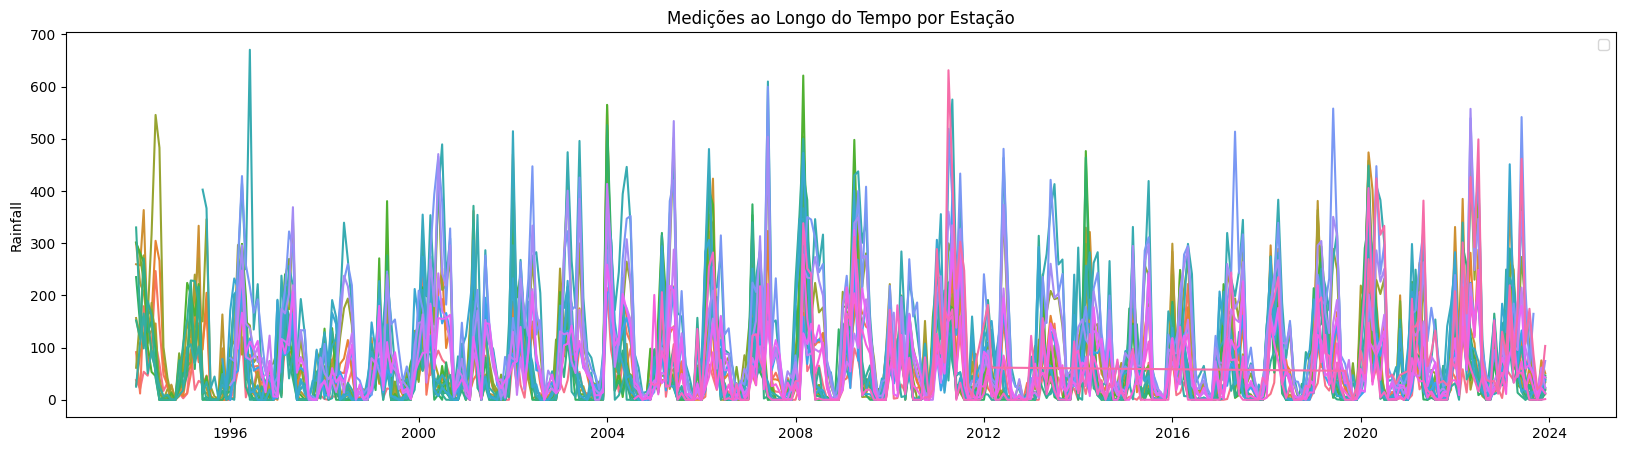

In [136]:
# 5. Analisar a distribuição dos dados de rainfall ao longo do tempo
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_teste, x='date', y='rainfall', hue='station', ci=None)
plt.title('Medições ao Longo do Tempo por Estação')
plt.xlabel('')
plt.ylabel('Rainfall')
plt.legend('')
plt.show()

# Divide treino e teste

In [137]:
### Interpolações
# Linear
# Spline
# Polinomial

### Imputação
# Média: Substitui valores ausentes pela média dos valores conhecidos.
# Mediana: Substitui valores ausentes pela mediana dos valores conhecidos.
# Regressão Linear: Usa uma regressão linear baseada em outras variáveis para prever e imputar valores ausentes.
# k-NN (k-Nearest Neighbors): Usa a média ou mediana dos k vizinhos mais próximos para imputar o valor ausente.
# MICE (Multiple Imputation by Chained Equations): Realiza múltiplas imputações, criando várias versões do conjunto de dados, e combina os resultados para maior robustez.
# Random Forest: Usa uma floresta aleatória para prever valores ausentes.
# Gradient Boosting: Similar ao Random Forest, mas utiliza a técnica de boosting.

### Metricas
# RMSE
# Pbias (%)
# nse
# mNSE
# R2

In [138]:
df_treino.reset_index(drop=True,inplace=True)
df_treino

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
0,Agua Branca,-7.5118,-37.6366,Sertão Paraibano,Serra do Teixeira,1994,1,1994-01-01,174.4,1
1,Aguiar,-7.0933,-38.1733,Sertão Paraibano,Piancó,1994,1,1994-01-01,441.5,1
2,Alagoa Grande,-7.0367,-35.6311,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,101.0,1
3,Alagoa Nova,-7.0542,-35.7578,Agreste Paraibano,Brejo Paraibano,1994,1,1994-01-01,68.5,1
4,Alagoinha,-6.9589,-35.5525,Agreste Paraibano,Guarabira,1994,1,1994-01-01,64.6,1
...,...,...,...,...,...,...,...,...,...,...
70761,Umbuzeiro,-7.6958,-35.6642,Agreste Paraibano,Umbuzeiro,2023,12,2023-12-01,58.8,1
70762,Várzea,-6.7722,-36.9925,Borborema,Seridó Ocidental Paraibano,2023,12,2023-12-01,58.2,1
70763,Vieirópolis,-6.5436,-38.2772,Sertão Paraibano,Sousa,2023,12,2023-12-01,99.7,1
70764,Vista Serrana/Desterro de Malta,-6.7386,-37.5683,Sertão Paraibano,Sousa,2023,12,2023-12-01,37.0,1


In [139]:
df_teste.reset_index(drop=True,inplace=True)
df_teste

,station,lat,long,mesoregion,microregion,year,month,date,rainfall,missing
0,Boa Vista,-7.257500,-36.2375,Agreste Paraibano,Campina Grande,1994,1,1994-01-01,37.7,1
1,Cacimba de Dentro,-6.636700,-35.7953,Agreste Paraibano,Curimataú Oriental,1994,1,1994-01-01,91.2,1
2,Caiçara,-6.614700,-35.4681,Agreste Paraibano,Guarabira,1994,1,1994-01-01,28.0,1
3,Catingueira,-7.128300,-37.6083,Sertão Paraibano,Piancó,1994,1,1994-01-01,259.6,1
4,Emas,-7.105800,-37.7153,Sertão Paraibano,Piancó,1994,1,1994-01-01,300.3,1
...,...,...,...,...,...,...,...,...,...,...
7898,São José do Sabugi,-6.774194,-36.8000,Borborema,Seridó Ocidental Paraibano,2023,12,2023-12-01,46.7,1
7899,São Sebastião de Lagoa de Roça,-7.067500,-35.8561,Agreste Paraibano,Esperança,2023,12,2023-12-01,42.7,1
7900,Serra Grande,-7.214200,-38.3722,Sertão Paraibano,Itaporanga,2023,12,2023-12-01,18.7,1
7901,Serra Redonda,-7.186100,-35.6797,Agreste Paraibano,Campina Grande,2023,12,2023-12-01,23.3,1


In [140]:
y_teste = df_teste['rainfall']
df_teste = df_teste.drop(columns=['rainfall'])

## Métricas

In [141]:
# Metricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

def rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

def pbias(true, pred):
    return 100 * np.sum(true - pred) / np.sum(true)

def nse(true, pred):
    return 1 - (np.sum((true - pred) ** 2) / np.sum((true - np.mean(true)) ** 2))

def mnse(true, pred):
    return 1 - (np.sum(np.abs(true - pred)) / np.sum(np.abs(true - np.mean(true))))

In [142]:
# Função que faz avaliação dos modelos
def evaluate_model(y_real, y_predito):    
    metrics = {
        'RMSE': rmse(y_real, y_predito),
        'PBIAS (%)': pbias(y_real, y_predito),
        'NSE': nse(y_real, y_predito),
        'mNSE': mnse(y_real, y_predito),
        'R²': r2_score(y_real, y_predito)
    }
    
    return metrics

## Modelo 1: Imputação baseado na microregiao e ano

In [143]:
def imputacao_por_microregiao(row, microregion_means):
    microregion = row['microregion']
    year = row['year']

    # Imputar pela média da microregião se existir
    microregion_value = microregion_means.loc[(microregion_means['microregion'] == microregion) & \
                                              (microregion_means['year'] == year), 'rainfall']
    
    if not microregion_value.empty:
        return microregion_value.values[0]
    else:
        return np.nan  # Caso não encontre a média para essa microregião

In [144]:
def impute_rainfall(df_train, df_test):
    # Calcular a média por microregião no conjunto de treino
    microregion_means = df_train.groupby(['microregion', 'year'])['rainfall'].mean().reset_index()

    # Imputar valores com base na média da microregião
    df_test['rainfall_pred'] = df_test.apply(lambda row: imputacao_por_microregiao(row, microregion_means), axis=1)

    return df_test

In [145]:
# Imputação que leva em consideração a microrregiao, mesoregiao e média anual
df_imputed = impute_rainfall(df_treino, df_teste)
metrics_mean = evaluate_model(y_teste, df_imputed['rainfall_pred'])


In [146]:
metrics_mean

{'RMSE': 85.30187917197016,
 'PBIAS (%)': 3.3602125557496274,
 'NSE': 0.11947209996661223,
 'mNSE': 0.0739198469664698,
 'R²': 0.11947209996661223}

# DRAFT \#############################

## Imputação baseado na estação mais proxima (Geodesic)

In [ ]:
pip install geopy

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

def impute_rainfall_geodesic(df_train, df_test):
    # DataFrame para armazenar os resultados
    results = df_test.copy()

    # Iterar sobre cada estação no conjunto de teste
    for index, row in results.iterrows():
        # Obter coordenadas da estação atual
        test_coords = (row['lat'], row['long'])
        
        # Calcular a distância para todas as estações no conjunto de treino
        df_train['distance'] = df_train[['lat', 'long']].apply(
            lambda x: geodesic(test_coords, (x['lat'], x['long'])).kilometers, axis=1
        )
        
        # Encontrar a estação mais próxima
        nearest_station = df_train.loc[df_train['distance'].idxmin()]
        
        # Atribuir o valor da precipitação da estação mais próxima
        results.at[index, 'rainfall'] = nearest_station['rainfall']

    return results

In [ ]:
# Exemplo de uso
df_test_imputed_geodesic = impute_rainfall_geodesic(df_treino, df_teste)
metrics = calculate_metrics(df_test_imputed_geodesic)
metrics

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from scipy.spatial import cKDTree

def impute_rainfall_geodesic(df_train, df_test):
    # DataFrame para armazenar os resultados
    results = df_test.copy()

    # Obter coordenadas das estações de treino
    train_coords = df_train[['lat', 'long']].to_numpy()
    train_values = df_train['rainfall'].to_numpy()

    # Criar uma árvore KD para busca de vizinhos
    tree = cKDTree(train_coords)

    # Iterar sobre cada estação no conjunto de teste
    for index, row in results.iterrows():
        if row['missing'] == 1:  # Se o valor estiver faltando
            # Obter coordenadas da estação atual
            test_coords = (row['lat'], row['long'])
            
            # Encontrar a estação mais próxima
            distance, nearest_index = tree.query(test_coords)
            
            # Atribuir o valor da precipitação da estação mais próxima
            results.at[index, 'rainfall'] = train_values[nearest_index]

    return results

# Exemplo de uso
df_test_imputed_geodesic = impute_rainfall_geodesic(df_treino, df_teste)
metrics = calculate_metrics(df_test_imputed_geodesic)
metrics


In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import KFold

In [ ]:
def calculate_metrics(df_test):
    df_test = df_test.dropna(subset=['rainfall', 'interpolated_rainfall'])

    rmse = np.sqrt(mean_squared_error(df_test['rainfall'], df_test['interpolated_rainfall']))
    pbias = 100 * (df_test['rainfall'].sum() - df_test['interpolated_rainfall'].sum()) / df_test['rainfall'].sum()
    nse = 1 - (np.sum((df_test['rainfall'] - df_test['interpolated_rainfall']) ** 2) /
               np.sum((df_test['rainfall'] - np.mean(df_test['rainfall'])) ** 2))
    mnse = 1 - (mean_squared_error(df_test['rainfall'], df_test['interpolated_rainfall']) / np.var(df_test['rainfall']))
    r2 = r2_score(df_test['rainfall'], df_test['interpolated_rainfall'])

    return {
        'RMSE': rmse,
        'PBIAS': pbias,
        'NSE': nse,
        'MNSE': mnse,
        'R2': r2
    }


In [ ]:
def cross_val_decision_tree(df, n_splits=5):
    X = df[['long', 'lat']]
    y = df['rainfall']

    model = DecisionTreeRegressor()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # DataFrame para armazenar as previsões e os valores reais
    results = pd.DataFrame(columns=['rainfall', 'interpolated_rainfall'])

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Adicionar os resultados ao DataFrame
        results = pd.concat([results, pd.DataFrame({
            'rainfall': y_test,
            'interpolated_rainfall': y_pred
        })], ignore_index=True)

    # Calcular as métricas usando a função existente
    metrics = calculate_metrics(results)

    return metrics

# Exemplo de uso
metrics_dt_cv = cross_val_decision_tree(df_treino, n_splits=5)
metrics_dt_cv

In [ ]:
def cross_val_random_forest(df, n_estimators=1000, n_splits=5):
    X = df[['long', 'lat']]
    y = df['rainfall']

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # DataFrame para armazenar as previsões e os valores reais
    results = pd.DataFrame(columns=['rainfall', 'interpolated_rainfall'])

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Adicionar os resultados ao DataFrame
        results = pd.concat([results, pd.DataFrame({
            'rainfall': y_test,
            'interpolated_rainfall': y_pred
        })], ignore_index=True)

    # Calcular as métricas usando a função existente
    metrics = calculate_metrics(results)

    return metrics

# Exemplo de uso
metrics_rf_cv = cross_val_random_forest(df_treino, n_estimators=100, n_splits=5)
metrics_rf_cv

In [ ]:
def cross_val_xgboost(df, n_splits=5):
    X = df[['long', 'lat']]
    y = df['rainfall']

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = pd.DataFrame(columns=['rainfall', 'interpolated_rainfall'])

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results = pd.concat([results, pd.DataFrame({
            'rainfall': y_test,
            'interpolated_rainfall': y_pred
        })], ignore_index=True)

    metrics = calculate_metrics(results)
    return metrics

# Exemplo de uso
metrics_xgboost_cv = cross_val_xgboost(df_treino, n_splits=5)
metrics_xgboost_cv


In [ ]:
from sklearn.neural_network import MLPRegressor

def cross_val_ann(df, n_splits=5):
    X = df[['long', 'lat']]
    y = df['rainfall']

    model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = pd.DataFrame(columns=['rainfall', 'interpolated_rainfall'])

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results = pd.concat([results, pd.DataFrame({
            'rainfall': y_test,
            'interpolated_rainfall': y_pred
        })], ignore_index=True)

    metrics = calculate_metrics(results)
    return metrics

# Exemplo de uso
metrics_ann_cv = cross_val_ann(df_treino, n_splits=5)
metrics_ann_cv


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def cross_val_polynomial_regression(df, degree=2, n_splits=5):
    X = df[['long', 'lat']]
    y = df['rainfall']

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = pd.DataFrame(columns=['rainfall', 'interpolated_rainfall'])

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)

        results = pd.concat([results, pd.DataFrame({
            'rainfall': y_test,
            'interpolated_rainfall': y_pred
        })], ignore_index=True)

    metrics = calculate_metrics(results)
    return metrics

# Exemplo de uso
metrics_poly_cv = cross_val_polynomial_regression(df_treino, degree=2, n_splits=5)
print("Metrics from cross-validation for Polynomial Regression:", metrics_poly_cv)


In [ ]:
from sklearn.linear_model import LinearRegression

def cross_val_linear_regression(df, n_splits=5):
    X = df[['long', 'lat']]
    y = df['rainfall']

    model = LinearRegression()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = pd.DataFrame(columns=['rainfall', 'interpolated_rainfall'])

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results = pd.concat([results, pd.DataFrame({
            'rainfall': y_test,
            'interpolated_rainfall': y_pred
        })], ignore_index=True)

    metrics = calculate_metrics(results)
    return metrics

# Exemplo de uso
metrics_lr_cv = cross_val_linear_regression(df_treino, n_splits=5)
print("Metrics from cross-validation for Linear Regression:", metrics_lr_cv)


In [ ]:
df_treino[df_treino['station'] == 'Agua Branca']

In [ ]:
df_treino.mesoregion.unique()

In [ ]:
df_teste.mesoregion.unique()